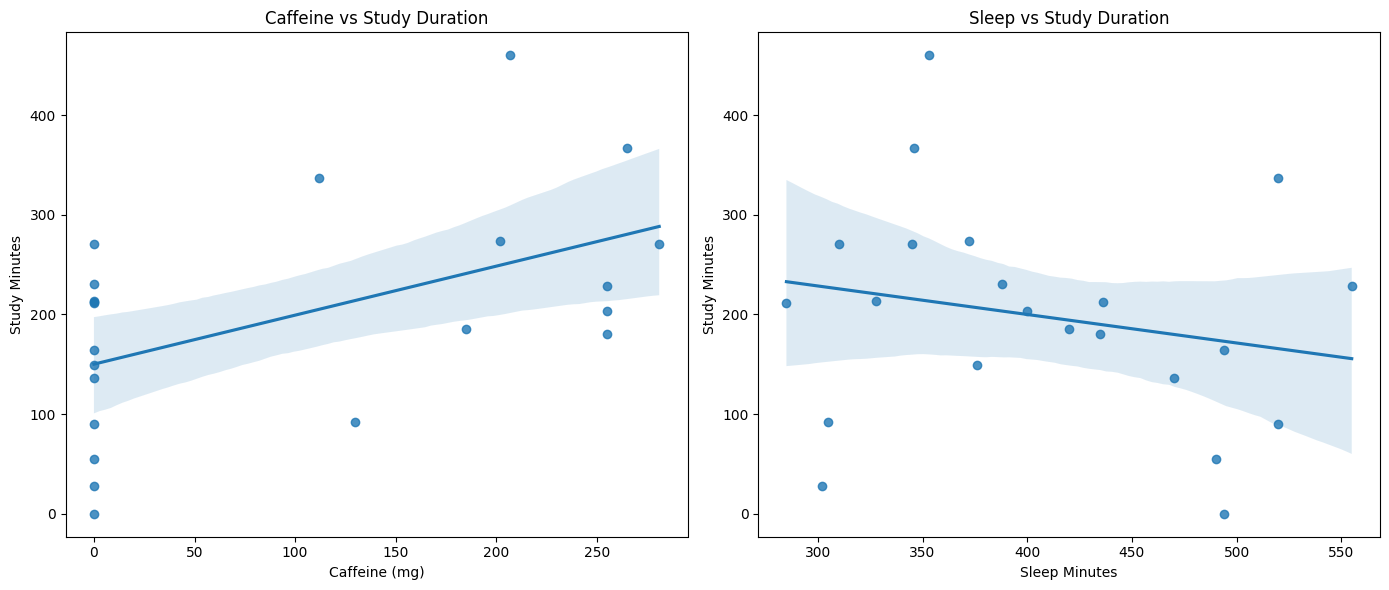

Correlation between caffeine and study time: r = 0.52, p = 0.014
Correlation between sleep and study time: r = -0.21, p = 0.343


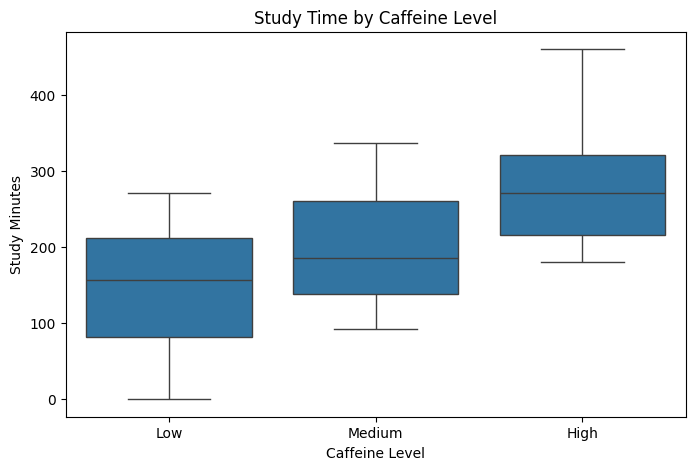

ANOVA F-statistic: 4.572, p-value: 0.024


In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
from scipy.stats import f_oneway

df = pd.read_csv("data.csv")

df = df.dropna(subset=["Caffeine (mg)", "Sleep Minutes", "Study Minutes"])

plt.figure(figsize=(14, 6))

# caffeine vs study duration with regression
plt.subplot(1, 2, 1)
sns.regplot(x='Caffeine (mg)', y='Study Minutes', data=df)
plt.title("Caffeine vs Study Duration")

# sleep vs study duration with regression
plt.subplot(1, 2, 2)
sns.regplot(x='Sleep Minutes', y='Study Minutes', data=df)
plt.title("Sleep vs Study Duration")

plt.tight_layout()
plt.show()

# correlation analysis
caffeine_corr, caffeine_p = pearsonr(df["Caffeine (mg)"], df["Study Minutes"])
sleep_corr, sleep_p = pearsonr(df["Sleep Minutes"], df["Study Minutes"])

print(f"Correlation between caffeine and study time: r = {caffeine_corr:.2f}, p = {caffeine_p:.3f}")
print(f"Correlation between sleep and study time: r = {sleep_corr:.2f}, p = {sleep_p:.3f}")


# categorizing caffeine intake
df['Caffeine Level'] = pd.cut(df['Caffeine (mg)'], bins=[-1, 100, 200, df['Caffeine (mg)'].max()], labels=['Low', 'Medium', 'High'])

#boxplot
plt.figure(figsize=(8, 5))
sns.boxplot(x='Caffeine Level', y='Study Minutes', data=df)
plt.title("Study Time by Caffeine Level")
plt.show()

low = df[df['Caffeine Level'] == 'Low']['Study Minutes']
med = df[df['Caffeine Level'] == 'Medium']['Study Minutes']
high = df[df['Caffeine Level'] == 'High']['Study Minutes']

f_stat, p_val = f_oneway(low, med, high)
print(f"ANOVA F-statistic: {f_stat:.3f}, p-value: {p_val:.3f}")